In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def individuaOutlier(data,t):
    
    
    movAvg=pd.rolling_mean(data,len(data)*t)
    #calcolo della Standard Deviation per identificazione outlier
    movStd=pd.rolling_std(data,len(data)*t)
    sec_outlier=list()
    cmp_outlier=list()
    for i in range(len(data)):
        if (abs(data[i]-movAvg[i])>2*movStd[i]):
            sec_outlier.append(i*t)
            cmp_outlier.append(i)

    print("Outlier presenti ai secondi:")
    print(sec_outlier)
    print("I campioni outlier sono")
    print(cmp_outlier)

    t=np.arange(0,len(data)*t,t)
    plt.figure(figsize=(10,10))
    plt.plot(t,data,color='g')
    plt.plot(t,movAvg,color='r')
    plt.show()
    
    return(cmp_outlier)

In [12]:
#cross-correlazione tra finestra con zero-padding e segnale 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import rfft, irfft

arrwnd=np.loadtxt("FinestreRef.npy")

def calcoloCCR(data, arrwnd,plotDis = True):

#le due liste da confrontare devono avere stessa lunghezza

    for i in range (len(arrwnd)):
   
        template=arrwnd[i].tolist()
    
    #Zero padding
        for i in range (10,len(data)):
            template.append(0)

    # Fast Fourier Transform (FFT)
        Data= rfft(data)
   
    # Inverto il vettore template
        tempY = []
        while len(template) > 0:
            tempY.append(template.pop())
    
        Y = rfft(tempY)

    # Faccio la formula inversa della FFT
        colpoDiSonno = False
        CrossCorrelazione = irfft(Data*Y)
        print(len(CrossCorrelazione))
        
        if(max(CrossCorrelazione)>4):
            colpoDiSonno = True
            print("Avvenuto colpo di sonno")
            if plotDis:
                x=np.arange(0,len(data))
                plt.plot(x,CrossCorrelazione)
                plt.xlabel("Campioni")
                plt.ylabel("CrossCorrelazione")
                line1=plt.plot(x,[3]*(len(data)),'r')
                plt.show()
         
        return colpoDiSonno

In [15]:
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets
import numpy as np
import time
import matplotlib.pyplot as plt


# initialize Grove IMU on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(1,4)

#empty lists creation
accX=list()
accY=list()
accZ=list()
pitch_l=list()

while (True):
    try:
        
        start=time.time()
        
        # get data from accelerometer
        motion = imu.get_motion()

        accX.append(motion[0])
        accY.append(motion[1])
        accZ.append(motion[2])
       
        #calculate pitch from accelerations
        argomento= motion[1]/np.sqrt(motion[0]*motion[0]*motion[1]*motion[1])
        pitch = np.arctan(argomento)
        pitch_l.append(pitch)
        
        time.sleep(0.05)
        
    except KeyboardInterrupt:
    # exit without showing errors if the stop button in Jupyter is pressed
        end=time.time()
        break

tc=(end-start)/len(accX) #tempo di campionamento effettivo

#array creation from data-filled lists
accX_arr=np.array(accX)
accY_arr=np.array(accY)
accZ_arr=np.array(accZ)
pitch_arr=np.array(pitch_l)


print(end-start)

np.savetxt("DataX12.npy", accX_arr)
np.savetxt("DataY12.npy", accY_arr)
np.savetxt("DataZ12.npy", accZ_arr)
np.savetxt("DataP12.npy",pitch_arr)



0.008126947999926415


610
Avvenuto colpo di sonno


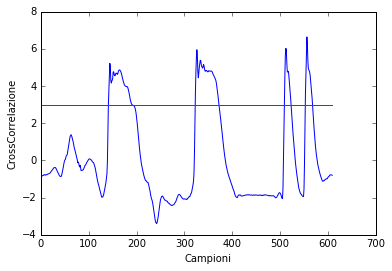

1.6087031699998988


In [16]:
#Analisi dati lungo Z
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tc=0.05
dataZ=np.loadtxt("DataZ12.npy")
start=time.time()
calcoloCCR(dataZ,arrwnd,True)
end=time.time()
print(str(end-start))

In [ ]:
#Analisi dati lungo Y
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataY2=np.loadtxt("DataY2.npy")
dataY3=np.loadtxt("DataY3.npy")

cmp_outlierY=individuaOutlier(dataY2,tc)
finestreY=taglioPicchi(dataY2,cmp_outlierY)
calcoloCCR(dataY3,finestreY)


In [ ]:
#Analisi dati del pitch
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataP3=np.loadtxt("DataP3.npy")

cmp_outlierP=individuaOutlier(dataP3,tc)

In [36]:
a = [0,1,2,3,4,5,6,7,8]
for i in range (5):
    print(a[len(a)-1-i:len(a)])


[8]
[7, 8]
[6, 7, 8]
[5, 6, 7, 8]
[4, 5, 6, 7, 8]
